# Lesson2: Introduction to Geopandas

- https://kodu.ut.ee/~kmoch/geopython2020/L2/geopandas-basics.html

In [1]:
import geopandas as gpd

fp = "DAMSELFISH_distributions.shp"

data = gpd.read_file(fp)

In [2]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [3]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."


<AxesSubplot:>

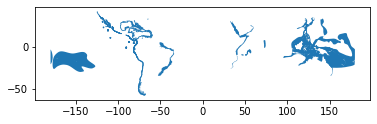

In [4]:
# import matplotlib and make it show plots directly (inline) in Jupyter notebooks
import matplotlib.pyplot as plt
%matplotlib inline

data.plot()

In [5]:
# Create a output path for the data
out_file_path = "DAMSELFISH_distributions_SELECTION.shp"

# Select first 50 rows, this a the numpy/pandas syntax to ``slice`` parts out a dataframe or array, from position 0 until (excluding) 50
selection = data[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(out_file_path)

In [6]:
data['geometry'].head()

0    POLYGON ((-115.64375 29.71392, -115.61585 29.6...
1    POLYGON ((-105.58995 21.89340, -105.56483 21.8...
2    POLYGON ((-111.15962 19.01536, -111.15948 18.9...
3    POLYGON ((-80.86500 -0.77894, -80.75930 -0.833...
4    POLYGON ((-67.33922 -55.67610, -67.33755 -55.6...
Name: geometry, dtype: geometry

In [7]:
selection = data[0:5]

In [8]:
for index, row in selection.iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001


In [9]:
data['area'] = data.area

C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [10]:
data['area'].head(2)

0    19.396254
1     6.145902
Name: area, dtype: float64

In [11]:
max_area = data['area'].max()
mean_area = data['area'].mean()

print("Max area: {:.2f}\nMean area: {:.2f}".format(round(max_area, 2), round(mean_area, 2)))

Max area: 1493.20
Mean area: 19.96


In [12]:
# Import necessary modules first
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

In [13]:
newdata

""


In [14]:
newdata['geometry'] = None

In [15]:
newdata

,geometry


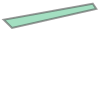

In [16]:
coordinates = [(26.722117, 58.380184), (26.724853, 58.380676), (26.724961, 58.380518), (26.722372, 58.379933)]
    
poly = Polygon(coordinates)

poly

In [17]:
newdata.loc[0, 'geometry'] = poly

newdata


,geometry
0,"POLYGON ((26.72212 58.38018, 26.72485 58.38068..."


In [18]:
newdata.loc[0, 'Location'] = 'Tartu Townhall Square'

newdata


,geometry,Location
0,"POLYGON ((26.72212 58.38018, 26.72485 58.38068...",Tartu Townhall Square


In [19]:
print(newdata.crs)

None


In [20]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg


# Set the GeoDataFrame's coordinate system to WGS84
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
newdata.crs


C:\dev\conda3\envs\geopy2020\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Geographic 2D CRS: +init=epsg:4326 +no_defs +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

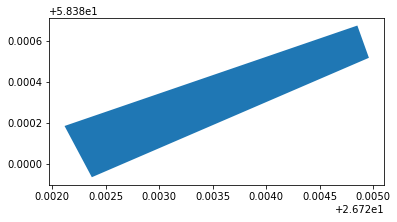

In [21]:
newdata.plot()

In [22]:
# Determine the output path for the Shapefile
out_file = "raekoja_plats.shp"

# Write the data into that Shapefile
newdata.to_file(out_file)

In [23]:
data

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry,area
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6...",19.396254
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8...",6.145902
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9...",2.697207
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833...",87.460621
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6...",0.000918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,183774.0,Azurina hirundo,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Azurina,hirundo,NT,"POLYGON ((-120.11829 34.47283, -120.10502 34.4...",5.990467
227,183774.0,Azurina hirundo,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Azurina,hirundo,NT,"POLYGON ((-117.41363 29.18823, -117.40898 29.1...",3.638651
228,183774.0,Azurina hirundo,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Azurina,hirundo,NT,"POLYGON ((-114.63839 28.39008, -114.63660 28.3...",2.849025
229,183774.0,Azurina hirundo,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Azurina,hirundo,NT,"POLYGON ((-111.15962 19.01536, -111.15948 18.9...",2.697207


In [24]:
# Group the data by column 'BINOMIAL'
grouped = data.groupby('BINOMIAL')

# Let's see what we got
grouped

In [25]:
# Iterate over the group object
for key, values in grouped:
    individual_fish = values
    print(key)

Abudefduf concolor
Abudefduf declivifrons
Abudefduf troschelii
Amphiprion sandaracinos
Azurina eupalama
Azurina hirundo
Chromis alpha
Chromis alta
Chromis atrilobata
Chromis crusma
Chromis cyanea
Chromis flavicauda
Chromis intercrusma
Chromis limbaughi
Chromis pembae
Chromis punctipinnis
Chrysiptera flavipinnis
Hypsypops rubicundus
Microspathodon bairdii
Microspathodon dorsalis
Nexilosus latifrons
Stegastes acapulcoensis
Stegastes arcifrons
Stegastes baldwini
Stegastes beebei
Stegastes flavilatus
Stegastes leucorus
Stegastes rectifraenum
Stegastes redemptus
Teixeirichthys jordani


In [26]:
# Let's see what is the LAST item that we iterated
individual_fish

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry,area
27,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((121.63003 33.04249, 121.63219 33.042...",38.671198
28,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((32.56219 29.97489, 32.56497 29.96967...",37.445735
29,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((130.90521 34.02498, 130.90710 34.022...",16.939460
30,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((56.32233 -3.70727, 56.32294 -3.70872...",10.126967
31,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((40.64476 -10.85502, 40.64600 -10.855...",7.760303
32,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((48.11258 -9.33510, 48.11406 -9.33614...",3.434236
33,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((51.75404 -9.21679, 51.75532 -9.21879...",2.408620


In [27]:
type(individual_fish)

geopandas.geodataframe.GeoDataFrame

In [28]:
print(key)

Teixeirichthys jordani


In [29]:
import os

# Determine outputpath
result_folder = "results"

# Create a new folder called 'Results' (if does not exist) to that folder using os.makedirs() function
if not os.path.exists(result_folder):
    os.makedirs(result_folder)

# Iterate over the
for key, values in grouped:
    # Format the filename (replace spaces with underscores)
    updated_key = key.replace(" ", "_")
    out_name = updated_key + ".shp"

    # Print some information for the user
    print( "Processing: {}".format(out_name) )

    # Create an output path, we join two folder names together without using slash or back-slash -> avoiding operating system differences
    outpath = os.path.join(result_folder, out_name)

    # Export the data
    values.to_file(outpath)

Processing: Abudefduf_concolor.shp
Processing: Abudefduf_declivifrons.shp
Processing: Abudefduf_troschelii.shp
Processing: Amphiprion_sandaracinos.shp
Processing: Azurina_eupalama.shp
Processing: Azurina_hirundo.shp
Processing: Chromis_alpha.shp
Processing: Chromis_alta.shp
Processing: Chromis_atrilobata.shp
Processing: Chromis_crusma.shp
Processing: Chromis_cyanea.shp
Processing: Chromis_flavicauda.shp
Processing: Chromis_intercrusma.shp
Processing: Chromis_limbaughi.shp
Processing: Chromis_pembae.shp
Processing: Chromis_punctipinnis.shp
Processing: Chrysiptera_flavipinnis.shp
Processing: Hypsypops_rubicundus.shp
Processing: Microspathodon_bairdii.shp
Processing: Microspathodon_dorsalis.shp
Processing: Nexilosus_latifrons.shp
Processing: Stegastes_acapulcoensis.shp
Processing: Stegastes_arcifrons.shp
Processing: Stegastes_baldwini.shp
Processing: Stegastes_beebei.shp
Processing: Stegastes_flavilatus.shp
Processing: Stegastes_leucorus.shp
Processing: Stegastes_rectifraenum.shp
Processi

# Lesson2: Map projections

- https://kodu.ut.ee/~kmoch/geopython2020/L2/crs-projections.html

In [30]:
import geopandas as gpd

# Filepath to the Europe borders Shapefile
fp = "Europe_borders.shp"

# Read data
data = gpd.read_file(fp)

In [31]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
data['geometry'].head()

0    MULTIPOLYGON (((19.50115 40.96230, 19.50563 40...
1    POLYGON ((1.43992 42.60649, 1.45041 42.60596, ...
2    POLYGON ((16.00000 48.77775, 16.00000 48.78252...
3    POLYGON ((5.00000 49.79374, 4.99724 49.79696, ...
4    POLYGON ((19.22947 43.53458, 19.22925 43.53597...
Name: geometry, dtype: geometry

In [33]:
# Let's take a copy of our layer
data_proj = data.copy()

# Reproject the geometries by replacing the values with projected ones
data_proj = data_proj.to_crs(epsg=3035)

In [34]:
data_proj['geometry'].head()

0    MULTIPOLYGON (((5122010.375 2035145.186, 51223...
1    POLYGON ((3618045.758 2206753.801, 3618896.570...
2    POLYGON ((4761568.782 2869552.349, 4761526.557...
3    POLYGON ((3961258.262 2976824.238, 3961083.984...
4    POLYGON ((5066801.274 2315488.073, 5066765.564...
Name: geometry, dtype: geometry

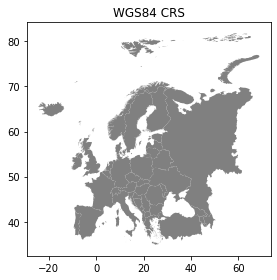

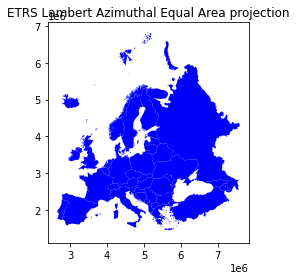

In [35]:
import matplotlib.pyplot as plt

%matplotlib inline


# Plot the WGS84
data.plot(facecolor='gray');

# Add title
plt.title("WGS84 CRS");

# Remove empty white space around the plot
plt.tight_layout()

# Plot the one with ETRS-LAEA projection
data_proj.plot(facecolor='blue');

# Add title
plt.title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()

In [36]:
# Ouput file path
out_fp = "Europe_borders_epsg3035.shp"

# Save to disk
data_proj.to_file(out_fp)

In [37]:
from shapely.geometry import Point

from fiona.crs import from_epsg



In [38]:
tartu_lon = 26.7290

tartu_lat = 58.3780

In [39]:
proj4_txt = '+proj=aeqd +lat_0={} +lon_0={} +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'.format(tartu_lat, tartu_lon)

In [40]:
proj4_txt

'+proj=aeqd +lat_0=58.378 +lon_0=26.729 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

In [41]:
data_d = data.to_crs(proj4_txt)

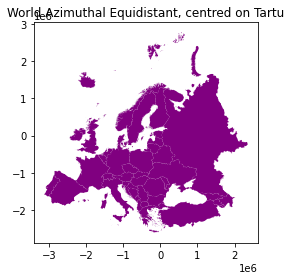

In [42]:
data_d.plot(facecolor='purple');

plt.title("World Azimuthal Equidistant, centred on Tartu");

plt.tight_layout();

In [43]:
tartu = gpd.GeoSeries([Point(tartu_lon, tartu_lat)], crs=from_epsg(4326))

C:\dev\conda3\envs\geopy2020\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [44]:
tartu = tartu.to_crs(proj4_txt)

In [45]:
print(tartu)

0    POINT (0.00000 0.00000)
dtype: geometry


In [46]:
data_d['country_centroid'] = data_d.centroid

In [47]:
data_d.head(2)

,NAME,ORGN_NAME,geometry,country_centroid
0,Albania,Shqipëria,"MULTIPOLYGON (((-616930.849 -1905901.378, -616...",POINT (-566125.440 -1891201.934)
1,Andorra,Andorra,"POLYGON ((-2059909.806 -1383253.286, -2059109....",POINT (-2051296.405 -1393144.787)


In [48]:
def calculateDistance(row, dest_geom, src_col='geometry'):
    """
    Calculates the distance between a single Shapely Point geometry and a GeoDataFrame with Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
        A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
        A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
        A name of the target column where the result will be stored.
    """
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)
    # Tranform into kilometers
    dist_km = dist/1000
    # Assign the distance to the original data
    return dist_km

In [49]:
tartu_geom = tartu.get(0)

In [50]:
print(tartu_geom)

POINT (0 0)


In [51]:
data_d['new_dist'] = data_d.apply(calculateDistance, dest_geom=tartu_geom, src_col='country_centroid', axis=1)

data_d.head(20)

,NAME,ORGN_NAME,geometry,country_centroid,new_dist
0,Albania,Shqipëria,"MULTIPOLYGON (((-616930.849 -1905901.378, -616...",POINT (-566125.440 -1891201.934),1974.118225
1,Andorra,Andorra,"POLYGON ((-2059909.806 -1383253.286, -2059109....",POINT (-2051296.405 -1393144.787),2479.651052
2,Austria,Österreich,"POLYGON ((-789218.354 -1007540.792, -789139.78...",POINT (-948755.523 -1114052.808),1463.301302
3,Belgium,België / Belgique,"POLYGON ((-1545487.015 -710685.915, -1545569.4...",POINT (-1539443.737 -612758.131),1656.912655
4,Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((-611931.236 -1618946.307, -611934.02...",POINT (-720901.335 -1534770.531),1695.647168
5,Croatia,Hrvatska,"MULTIPOLYGON (((-993254.065 -1456331.349, -994...",POINT (-817203.750 -1426447.263),1643.950658
6,Czech Republic,Cesko,"POLYGON ((-836233.081 -763077.620, -835498.235...",POINT (-820305.756 -893458.815),1212.918046
7,Denmark,Danmark,"MULTIPOLYGON (((-937254.738 -280819.978, -9379...",POINT (-1031556.205 -139241.433),1040.911322
8,Estonia,Eesti,"MULTIPOLYGON (((-162360.830 -27988.570, -16287...",POINT (-68261.667 33616.470),76.090225
9,Finland,Suomi,"MULTIPOLYGON (((-257841.948 215108.641, -25828...",POINT (-27931.560 653427.451),654.024163


In [52]:
max_dist = data_d['new_dist'].max()

mean_dist = data_d['new_dist'].mean()

print("Maximum distance to Tartu is {:.2f} km, and the mean distance is {:.2f} km.".format(max_dist, mean_dist))


Maximum distance to Tartu is 3403.98 km, and the mean distance is 1688.60 km.


In [53]:
data = data.to_crs(from_epsg(3035))

tartu = gpd.GeoSeries([Point(tartu_lon, tartu_lat)], crs=from_epsg(4326))
tartu = tartu.to_crs(from_epsg(3035))
tartu_geom = tartu.get(0)

data['country_centroid'] = data.geometry.centroid

data['new_dist'] = data.apply(calculateDistance, dest_geom=tartu_geom, src_col='country_centroid', axis=1)

data.head(20)

C:\dev\conda3\envs\geopy2020\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,NAME,ORGN_NAME,geometry,country_centroid,new_dist
0,Albania,Shqipëria,"MULTIPOLYGON (((5122010.375 2035145.186, 51223...",POINT (5167869.747 2060866.505),1977.146064
1,Andorra,Andorra,"POLYGON ((3618045.758 2206753.801, 3618896.570...",POINT (3628539.326 2199335.635),2475.905474
2,Austria,Österreich,"POLYGON ((4761568.782 2869552.349, 4761526.557...",POINT (4631147.196 2728937.248),1462.510780
3,Belgium,België / Belgique,"POLYGON ((3961258.262 2976824.238, 3961083.984...",POINT (3944209.479 3072545.081),1654.788548
4,Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((5066801.274 2315488.073, 5066765.564...",POINT (4943523.525 2372738.415),1697.369451
5,Croatia,Hrvatska,"MULTIPOLYGON (((4663467.501 2386592.971, 46625...",POINT (4827100.144 2456127.096),1644.799740
6,Czech Republic,Cesko,"POLYGON ((4660362.002 3095920.075, 4661208.589...",POINT (4705636.380 2973034.221),1211.845070
7,Denmark,Danmark,"MULTIPOLYGON (((4449191.637 3539069.631, 44482...",POINT (4323598.894 3652905.447),1039.734089
8,Estonia,Eesti,"MULTIPOLYGON (((5140250.282 3968949.899, 51397...",POINT (5216503.622 4050864.887),76.246525
9,Finland,Suomi,"MULTIPOLYGON (((4988053.825 4182319.699, 49876...",POINT (5100295.670 4660209.133),654.402264


In [54]:
max_dist = data['new_dist'].max()

mean_dist = data['new_dist'].mean()

print("Maximum distance to Tartu is {:.2f} km, and the mean distance is {:.2f} km.".format(max_dist, mean_dist))


Maximum distance to Tartu is 3392.24 km, and the mean distance is 1687.63 km.


In [55]:
print("with accurate centering: Maximum distance to Tartu is 3403.98 km, and the mean distance is 1688.60 km.")

with accurate centering: Maximum distance to Tartu is 3403.98 km, and the mean distance is 1688.60 km.
